In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymeshlab as mlab
import os

femesh_quality = {}
mesh_names ={}
femesh_size = {}
surface_mesh_times = {}
surface_mesh_size = {}
dir = 'C:\\Users\\amcsween\\Documents\\GitHub\\NeuronSet2\\Random_Cells\\surface_meshes2'
femesh_quality['Our method'] = np.load(f'{dir}/mesh_quality.npy')
mesh_names['Our method'] = list(np.loadtxt(f'{dir}/watertight_mesh.txt',dtype=str))
femesh_size['Our method'] =  np.load(f'{dir}/mesh_size.npy')
surface_mesh_times['Our method'] =  np.load(f'{dir}/times.npy')
surface_mesh_size['Our method'] =  np.load(f'{dir}/surface_size.npy')





In [3]:
femesh_size

{'Our method': array([  64888,    5311,   22202,   29740,   11953, 1095536,   23264,
          46391,   71694,  181765,     303,     128,    2578,   11307,
         195854, 1039857,  178821,   91216,    6310,   15910,   12567,
          56952,   21021,    1261,   12412,   30094,   37417,     944,
          52726,   34663,   16356,   83201,   84264,   99694,    8460,
           5375,   10111,   11473,   71699,   11220,    5842,  716996,
          42032,   22402,  177122,    8309,   45882,   65736,    4572,
          54824])}

In [4]:
dir = 'C:\\Users\\amcsween\\Desktop\\AnaMorph_comparison\\Random_Cells'
femesh_quality['anamorph'] = np.load(f'{dir}/femesh_quality.npy')
mesh_names['anamorph'] = list(np.loadtxt(f'{dir}/watertight_meshes.txt',dtype=str))
femesh_size['anamorph'] =  np.load(f'{dir}/femesh_size.npy')
surface_mesh_times['anamorph'] =  np.load(f'{dir}/times.npy')
surface_mesh_size['anamorph'] =  np.load(f'{dir}/surface_size.npy')


dir = 'C:\\Users\\amcsween\\Desktop\\Ultraliser_comparison\\Random_Cells_watertight'
femesh_quality['ultraliser_watertight'] = np.load(f'{dir}/femesh_quality.npy')
mesh_names['ultraliser_watertight'] = list(np.loadtxt(f'{dir}/watertight_meshes.txt',dtype=str))
femesh_size['ultraliser_watertight'] =  np.load(f'{dir}/femesh_size.npy')
surface_mesh_times['ultraliser_watertight'] =  np.load(f'{dir}/times.npy')
surface_mesh_size['ultraliser_watertight'] =  np.load(f'{dir}/surface_size.npy')

dir = 'C:\\Users\\amcsween\\Desktop\\Ultraliser_comparison\\Random_Cells'
# femesh_quality['ultraliser_optimized'] = np.load(f'{dir}/femesh_quality.npy')
mesh_names['ultraliser_optimized'] = list(np.loadtxt(f'{dir}/watertight_meshes.txt',dtype=str))
# femesh_size['ultraliser_optimized'] =  np.load(f'{dir}/femesh_size.npy')
surface_mesh_times['ultraliser_optimized'] =  np.load(f'{dir}/times.npy')
surface_mesh_size['ultraliser_optimized'] =  np.load(f'{dir}/surface_size_optimized.npy')


# dir = 'C:\\Users\\amcsween\\Desktop\\Ultraliser_modified_comparison\\Random_Cells'
# femesh_quality['ultraliser_modified'] = np.load(f'{dir}/femesh_quality.npy')
# mesh_names['ultraliser_modified'] = list(np.loadtxt(f'{dir}/watertight_meshes.txt',dtype=str))
# femesh_size['ultraliser_modified'] =  np.load(f'{dir}/femesh_size.npy')
# surface_mesh_times['ultraliser_modified'] =  np.load(f'{dir}/times.npy')
# surface_mesh_size['ultraliser_modified'] =  np.load(f'{dir}/surface_size_optimized.npy')





FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amcsween\\Desktop\\Ultraliser_comparison\\Random_Cells_watertight/femesh_quality.npy'

In [6]:
a = surface_mesh_times['ultraliser_watertight']
np.std(a)

23.467357918231865

In [7]:
N_anamorph = len(surface_mesh_size['anamorph'])
N_ultraliser_watertight = len(surface_mesh_size['ultraliser_watertight'])
N_ultraliser_optimized = len(surface_mesh_size['ultraliser_optimized'])


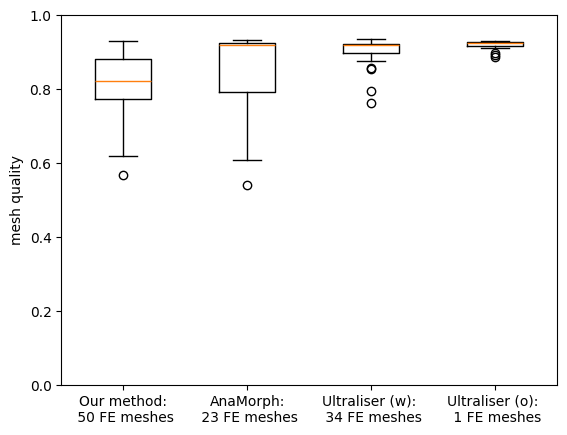

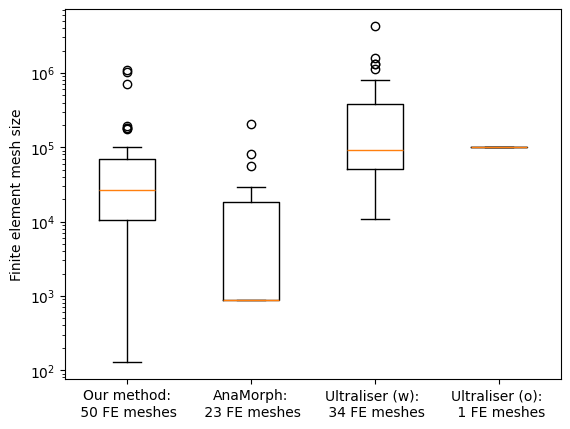

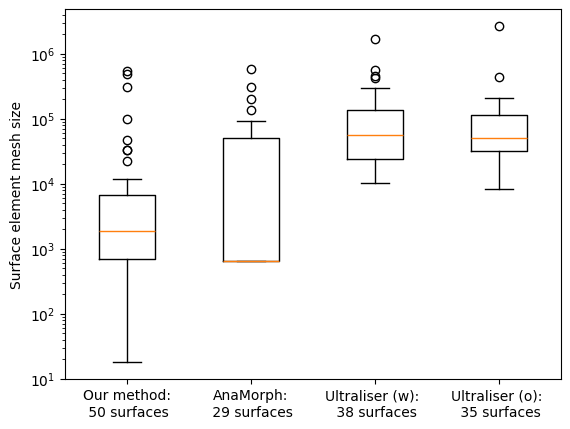

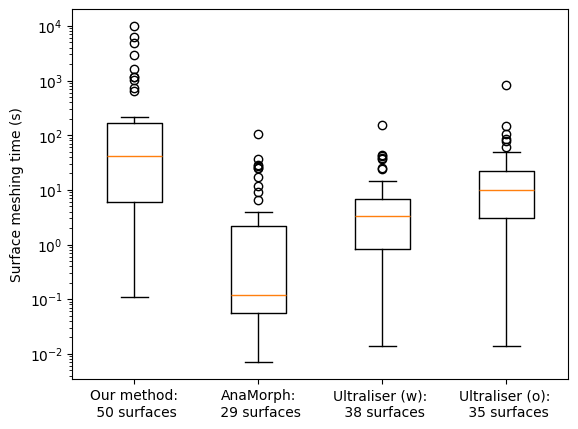

In [8]:
keys = ('Our method:\n 50 FE meshes','AnaMorph:\n 23 FE meshes',f'Ultraliser (w): \n 34 FE meshes',f'Ultraliser (o): \n 1 FE meshes')

figdir = 'C:\\Users\\amcsween\\Pictures\\meshing_paper'


fig, ax = plt.subplots()
ax.boxplot(femesh_quality.values())
ax.set_xticklabels(keys)
ax.set_ylim((0,1))
ax.set_ylabel('mesh quality')
plt.savefig(f'{figdir}/boxplot_femesh_quality.png')
plt.show()

fig, ax = plt.subplots()
ax.boxplot(femesh_size.values())
ax.set_xticklabels(keys)
ax.set_yscale('log')
ax.set_ylabel('Finite element mesh size')
plt.savefig(f'{figdir}/boxplot_femesh_size.png')

plt.show()

keys = ('Our method:\n 50 surfaces',f'AnaMorph:\n {N_anamorph} surfaces',f'Ultraliser (w): \n {N_ultraliser_watertight} surfaces', f'Ultraliser (o): \n {N_ultraliser_optimized} surfaces')


fig, ax = plt.subplots()
ax.boxplot(surface_mesh_size.values())
ax.set_xticklabels(keys)
ax.set_yscale('log')
ax.set_ylabel('Surface element mesh size')
plt.savefig(f'{figdir}/boxplot_surface_mesh_size.png')

plt.show()

fig, ax = plt.subplots()
ax.boxplot(surface_mesh_times.values())
ax.set_xticklabels(keys)
ax.set_yscale('log')
ax.set_ylabel('Surface meshing time (s)')
plt.savefig(f'{figdir}/boxplot_surface_mesh_times.png')
plt.show()



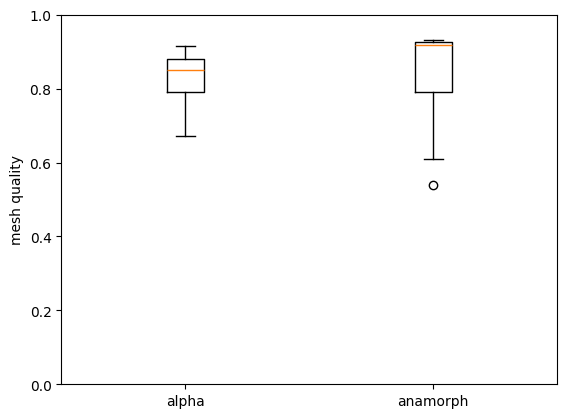

Anamorph vs alphaSwc


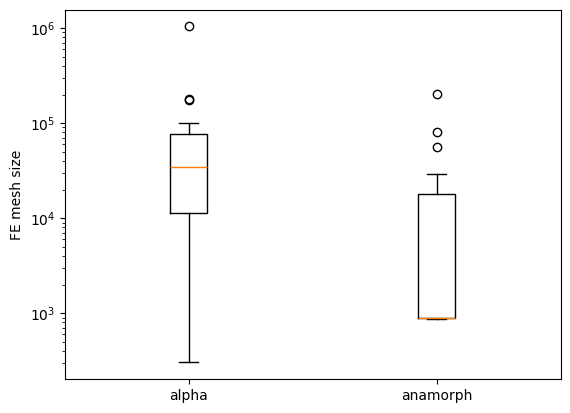

Anamorph vs alphaSwc


In [33]:
names1 = mesh_names['alpha']
names2 = [name.replace('_post_processed.obj','') for name in mesh_names['anamorph']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':femesh_quality['alpha'][ind], 'anamorph':femesh_quality['anamorph']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_ylim((0,1))
ax.set_ylabel('mesh quality')

plt.show()
print('Anamorph vs alphaSwc')


names1 = mesh_names['alpha']
names2 = [name.replace('_post_processed.obj','') for name in mesh_names['anamorph']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':femesh_size['alpha'][ind], 'anamorph':femesh_size['anamorph']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_yscale('log')
ax.set_ylabel('FE mesh size')

plt.show()
print('Anamorph vs alphaSwc')

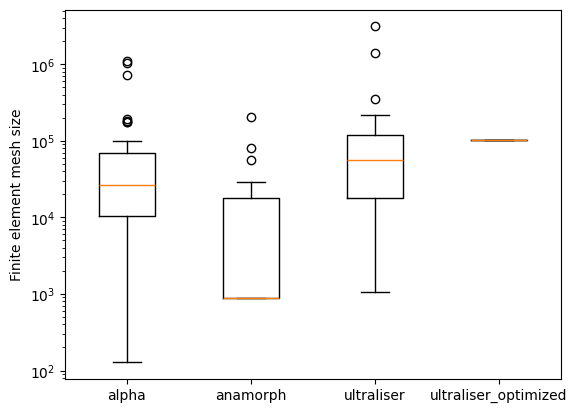

In [35]:
fig, ax = plt.subplots()
ax.boxplot(mesh_size.values())
ax.set_xticklabels(mesh_size.keys())
ax.set_yscale('log')
ax.set_ylabel('Finite element mesh size')

plt.show()

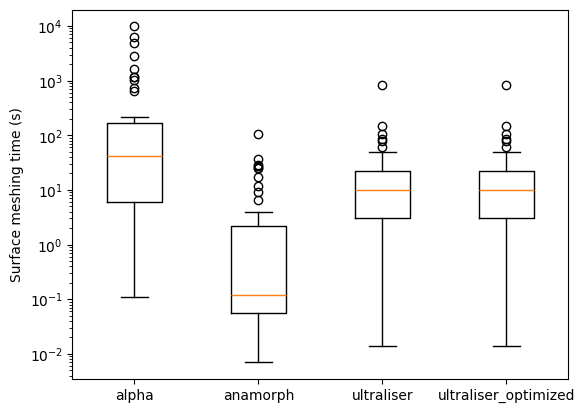

In [36]:
fig, ax = plt.subplots()
ax.boxplot(surface_mesh_times.values())
ax.set_xticklabels(surface_mesh_times.keys())
ax.set_yscale('log')
ax.set_ylabel('Surface meshing time (s)')

plt.show()

In [20]:
ind

[]

In [25]:
names2

['1A-06-traced-control-21CNG',
 '21162rbkof_08CNG',
 '3792823CNG',
 '4-3_24CNG',
 '4s2-CA1-06-12-22CNG',
 '5A-2-traced-control-1CNG',
 'AD0602-PL-L-3401-fiber05CNG',
 'Adol_2M_NoLight-12CNG',
 'Anstoetz_Toolbox-IN4CNG',
 'asl-rhin-CB4-20_11_03CNG',
 'asl-rhin-CD2-20_0009-2_01CNG',
 'C12_1-6_80um_GFAP_Z-fixed0102_08-April16_C31CNG',
 'C2-Tipo-III-1CNG',
 'Casp6_C163A_Neuron_11CNG',
 'CCKBC_Calb_A141126-02CNG',
 'cell-185-traceCNG',
 'Cortex_1264-7CNG',
 'E3F-230_1_DCNG',
 'fru-F-700195CNG',
 'fru-F-700196CNG',
 'GFP_50_2CNG',
 'Gunnersen_A12b3slice1LHSCNG',
 'H1-11CNG',
 'H9-MECP2-T158M-T158M-Untreated-45CNG',
 'Hoxd10-none-righteyecontrol-04292013-40x-cell1-stitchCNG',
 'Hoxd10-none-righteyecontrol-04292013-40x-cell2-09zoomCNG',
 'j140508b-cell-6CNG',
 'Neuron_id0094CNG',
 'Neuron_id0667CNG',
 'Neuron_id0669CNG',
 'NOS1AP2_2_1dCNG',
 'OB_Development_P7_M_Animal01_Trace058CNG',
 'P105_1-6_80um_GFAP_Z-fixed0101_12-Octuber15_sec8cel6pb105CNG',
 'pcs9_6_1CNG',
 'PL7CNG',
 'PVN27_microglia2

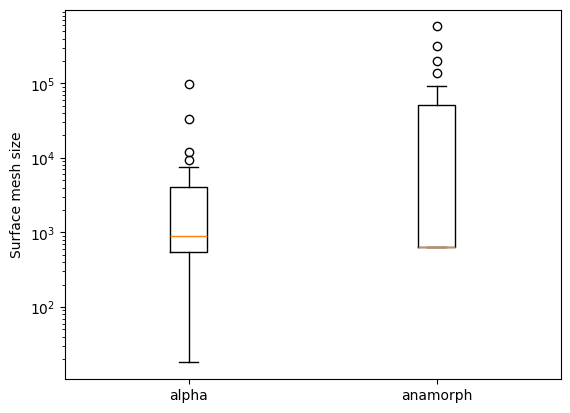

Anamorph vs alphaSwc


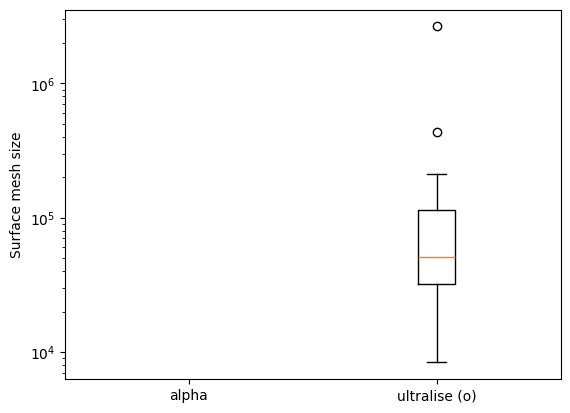

Ultralise (o) vs alphaSwc


In [30]:
names1 = mesh_names['alpha']
names2 = [name.replace('_post_processed.obj','') for name in mesh_names['anamorph']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':surface_mesh_size['alpha'][ind], 'anamorph':surface_mesh_size['anamorph']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_yscale('log')
ax.set_ylabel('Surface mesh size')

plt.show()
print('Anamorph vs alphaSwc')

names1 = mesh_names['alpha']
names2 = [name.replace('-optimized','CNG') for name in mesh_names['ultraliser_optimized']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':surface_mesh_size['alpha'][ind], 'ultralise (o)':surface_mesh_size['ultraliser_optimized']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_yscale('log')
ax.set_ylabel('Surface mesh size')

plt.show()
print('Ultralise (o) vs alphaSwc')


In [ ]:


names1 = mesh_names['alpha']
names2 = [name.replace('-watertight','CNG') for name in mesh_names['ultraliser_watertight']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':surface_mesh_size['alpha'][ind], 'ultralise (w)':surface_mesh_size['ultraliser_watertight']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_yscale('log')
ax.set_ylabel('Surface mesh size')

plt.show()
print('Ultralise (w) vs alphaSwc')


In [15]:
mesh_names.keys()

dict_keys(['alpha', 'anamorph', 'ultraliser_watertight', 'ultraliser_optimized'])

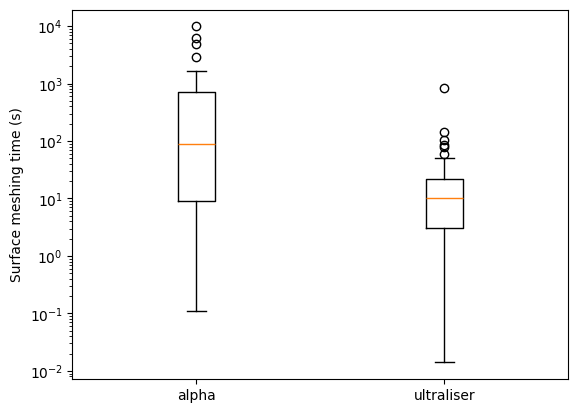

Ultraliser vs alphaSwc


In [38]:
names1 = mesh_names['alpha']
names2 = [name.replace('-watertight','.CNG') for name in mesh_names['ultraliser']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':surface_mesh_times['alpha'][ind], 'ultraliser':surface_mesh_times['ultraliser']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_yscale('log')
ax.set_ylabel('Surface meshing time (s)')

plt.show()
print('Ultraliser vs alphaSwc')

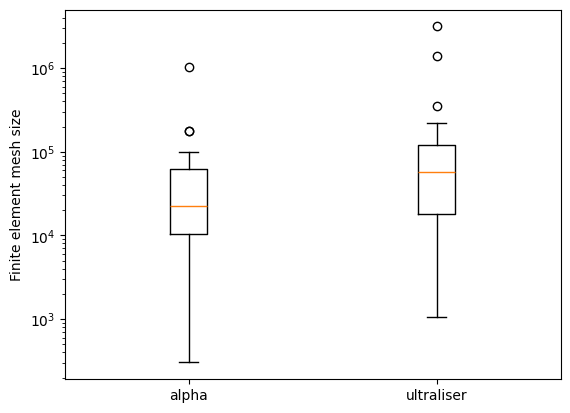

Ultraliser vs alphaSwc


In [39]:
names1 = mesh_names['alpha']
names2 = [name.replace('-watertight','.CNG') for name in mesh_names['ultraliser']]
ind = [i for (i,name) in enumerate(names1) if name in names2]

data ={'alpha':femesh_size['alpha'][ind], 'ultraliser':femesh_size['ultraliser']}

fig, ax = plt.subplots()
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_yscale('log')
ax.set_ylabel('Finite element mesh size')


plt.show()
print('Ultraliser vs alphaSwc')